In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
img=Image.open('BSDS_361010.jpg')

processor=CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
model=CLIPModel.from_pretrained('openai/clip-vit-base-patch32')

captions=['Two horses are running on grass', 'Students are eating', 'Croquet playing on horses', 'Golf playing on horses']
inputs=processor(text=captions,images=img,return_tensors='pt',padding=True)
res=model(**inputs)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

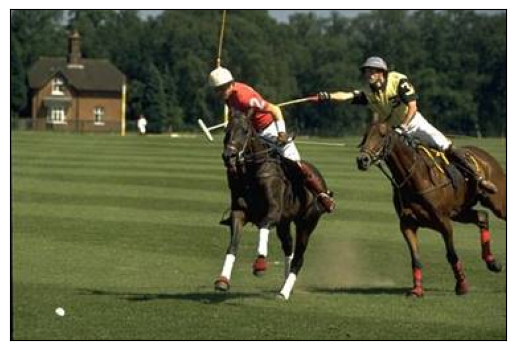

Two horses are running on grass :  10.12
Students are eating :  0.00
Croquet playing on horses :  51.64
Golf playing on horses :  38.24


In [ ]:
plt.imshow(img); plt.xticks([]); plt.yticks([]); plt.show()
logits=res.logits_per_image
probs=logits.softmax(dim=1)
for i in range(len(captions)):
    print(captions[i],': ','{:.2f}'.format(float(probs[0,i]*100.0)))